# Aviation Accident Analysis: Identifying Low-Risk Aircraft

## 1. Project Overview

This project aims to analyze aviation accident data from 1962 to 2023 to determine which aircraft types present the lowest risk for potential purchase and operation. The analysis will provide actionable insights for the head of the new aviation division to make informed decisions about aircraft acquisition.

## 2. Business Understanding

The company is diversifying its portfolio by entering the aviation sector. Understanding the risks associated with different aircraft types is crucial for making strategic decisions and minimizing potential losses. The key business questions include:

*   Which aircraft types have the lowest accident rates?
*   What are the primary factors contributing to aviation accidents?
*   How can the company mitigate risks associated with operating aircraft?

## 3. Installing Packages and Importing Libraries

This section covers the installation of necessary Python packages and importing them for data analysis and visualization.



In [266]:
# install the packages on cmd/bash by "pip install pandas numpy matplotlib seaborn plotly scikit-learn ipywidgets"

#Import the installed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

sns.set(style="whitegrid")

## 4.	Data Understanding and Preparation

This section covers loading the aviation accident data into a pandas DataFrame, providing a brief description of the dataset, and displaying initial information about its structure and content.

### 4.1. Loading the Data

The aviation accident data is loaded from a CSV file into a pandas DataFrame using the `read_csv` function. The file path is specified, and error handling is included to manage potential issues such as the file not being found.



In [283]:
# Load the aviation accident dataset
try:
    df = pd.read_csv('aviation_data.csv', encoding='latin1')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'aviation_data.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    print("Error: 'aviation_data.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")


Data loaded successfully!


<ipython-input-283-891b25d90f7c>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aviation_data.csv', encoding='latin1')



### 4.2. Data Description and Information

After loading the data, it is essential to understand its structure, data types, and the presence of missing values. The `head()` function is used to display the first few rows of the DataFrame, providing a glimpse into the data's content. The `info()` function provides a summary of the DataFrame, including the column names, data types, and the number of non-null values.



In [284]:
# Display the first few rows of the dataframe / # Show columns and a sample
if 'df' in locals():
    print(df.head())
    print(df.columns)
    print(df.info())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

## 4.3. Data Cleaning and Preparation

This section involves cleaning the data by handling encoding issues, addressing missing values, selecting relevant columns, and converting data types. The goal is to prepare the data for analysis and ensure its quality and consistency.

### 4.3.1. Handling Encoding Issues

The initial attempt to load the data resulted in a `UnicodeDecodeError`, indicating that the file is not encoded in UTF-8. To address this, we try different encodings such as `'latin1'` and `'utf-16'` to load the data successfully.



In [285]:
# Attempt to load the data with different encodings
try:
    df = pd.read_csv('aviation_data.csv', encoding='latin1')
    print("Data loaded successfully with latin1 encoding!")
except UnicodeDecodeError:
    try:
        df = pd.read_csv('aviation_data.csv', encoding='utf-16')
        print("Data loaded successfully with utf-16 encoding!")
    except UnicodeDecodeError:
        print("Error: Unable to decode the file with utf-8, latin1, or utf-16 encoding. Try a different encoding or check the file.")
        df = None  # Set df to None if loading fails
except FileNotFoundError:
    print("Error: 'aviation_data.csv' not found. Please check the file path.")
    df = None  # Set df to None if file not found
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    df = None  # Set df to None if any other error occurs

# Check if the DataFrame was loaded successfully before proceeding
if df is not None:
    print(df.head())
    print(df.info())
else:
    print("DataFrame could not be loaded. Please check the file and encoding.")


<ipython-input-285-88b5f14381a3>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aviation_data.csv', encoding='latin1')


Data loaded successfully with latin1 encoding!
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal

In [286]:
# Check the first few rows to understand the structure of the data
print(df.head())

# Check the data types of each column to understand if the data is in the correct format
print(df.dtypes)

# Check the shape (rows and columns) of the dataset
print(f"Dataset shape: {df.shape}")

# Check for missing values in the dataset
print("\nMissing values per column:")
print(df.isnull().sum())

# Check summary statistics for all numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())


         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

### 4.4. Selecting Columns of Interest and Renaming

Based on the project's objectives, specific columns are selected for analysis. These columns are relevant to determining the risk associated with different aircraft types. Additionally, some columns are renamed for clarity and consistency.

Given the project's focus on determining the lowest-risk aircraft, the following are the most relevant columns and the reason for inclusion:

**Event.Id:** Provides a unique identifier for each aviation incident, allowing for specific incident tracking.

**Investigation.Type:** Helps understand the type of investigation conducted, which could indicate the severity or complexity of the incident.

**Accident.Number:** Adds another layer of unique identification, ensuring accurate mapping of incidents to aircraft types.

**Event.Date:** Critical for identifying trends over time, such as whether older aircraft are involved in more incidents or if accident rates are rising.

**Location:** Provides the general geographic context of the incident, allowing for location-based risk analysis.

**Country:** Helps assess if certain countries have higher accident rates or if there are regulatory or operational risks in specific regions.

**Latitude and Longitude:** Geographic coordinates enable spatial analysis, helping to identify areas where accidents are more frequent (e.g., certain airports or regions with higher risks).

**Airport.Code and Airport.Name:** Knowing which airports have higher accident rates can be useful for operational risk management and decision-making regarding routes or maintenance hubs.

**Injury.Severity:** Understanding the severity of injuries (fatal, serious, minor) helps assess the overall risk of each aircraft model, including its impact on human safety.

**Aircraft.Damage**: Indicates the level of damage caused by an accident, helping assess the overall impact on the aircraft’s reliability and safety.

**Aircraft.Category:** The category of the aircraft can affect its risk profile (e.g., small planes vs. large commercial jets).

**Registration.Number:** Provides a unique identifier for each aircraft, enabling the linking of incidents to specific aircraft for more granular analysis.

**Make and Model:** Key factors in identifying aircraft that consistently perform better or worse in terms of safety.

**Amateur.Built:** Differentiates between professionally built and amateur-built aircraft, which may have different risk profiles.

**Number.of.Engines and Engine.Type:** Aircraft with different engine configurations may have different failure rates or risks associated with engine malfunction.

**FAR.Description:** Understanding the type of operations that an aircraft is cleared for, which could influence the risk involved in specific types of flights.

**Schedule:** Knowing if the aircraft is used for scheduled commercial flights or other operations helps gauge the aircraft’s operational profile.

**Purpose.of.flight:** Differentiates between commercial and private flights, where commercial operations may involve stricter regulations and safety checks.

**Air.carrier:** Indicates whether the aircraft is operated by a recognized commercial carrier or a private entity, which could affect the risk associated with flight operations.

**Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries:** These injury-related metrics provide a clear view of the severity of accidents and contribute to assessing the overall safety of an aircraft.

**Weather.Condition:** Weather is a critical factor in many accidents. Analyzing this can help determine if incidents are weather-related or inherent to the aircraft.

**Broad.phase.of.flight:** Some aircraft may be more prone to accidents during certain phases (e.g., takeoff, landing, cruising). This column can help identify where the risks are higher.

**Report.Status:** Indicates whether the investigation is completed or ongoing, providing insight into the reliability and completeness of the data.

**Publication.Date:** Provides context regarding when the data was made publicly available, which may influence the relevance or timeliness of the findings.

By incorporating these columns, we can better identify patterns and trends in aviation incidents, allowing for a deeper understanding of the risks associated with different aircraft types.


In [287]:
# Print the original columns to inspect
print(df.columns.tolist())  # Check all column names

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# List of the selected columns
columns_of_interest = [
    'Event.Id',
    'Investigation.Type',
    'Accident.Number',
    'Event.Date',
    'Location',
    'Country',
    'Latitude',
    'Longitude',
    'Airport.Code',
    'Airport.Name',
    'Injury.Severity',
    'Aircraft.damage',
    'Aircraft.Category',
    'Registration.Number',
    'Make',
    'Model',
    'Amateur.Built',
    'Number.of.Engines',
    'Engine.Type',
    'FAR.Description',
    'Schedule',
    'Purpose.of.flight',
    'Air.carrier',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Weather.Condition',
    'Broad.phase.of.flight',
    'Report.Status',
    'Publication.Date'
]

# Filter the dataframe to include only the columns of interest
df = df[columns_of_interest]

# Rename the columns for consistency (adjust based on your dataframe's exact column names)
df = df.rename(columns={
    'Total.Fatal.Injuries': 'Total_Fatal_Injuries',
    'Total.Serious.Injuries': 'Total_Serious_Injuries',
    'Total.Minor.Injuries': 'Total_Minor_Injuries',
    'Weather.Condition': 'Weather_Condition',
    'Broad.phase.of.flight': 'Phase_of_Flight',
    'Purpose.of.flight': 'Purpose_of_Flight',
    'Event.Id': 'Event_Id',
    'Aircraft.damage': 'Aircraft_Damage',
    'Aircraft.Category': 'Aircraft_Category',
    'Injury.Severity': 'Injury_Severity',
    'Total.Uninjured': 'Total_Uninjured'
})

# Verify the new column names
print("\nRenamed columns:")
print(df.columns.tolist())

# Display the cleaned dataframe with renamed columns
print("\nFirst few rows of the cleaned dataframe:")
print(df.head())



['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']

Renamed columns:
['Event_Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose_of_Flight', 'Air.carrier', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries'


Explanation:

*   The `columns_of_interest` list is updated to include only the columns deemed most relevant to the project goals.
*   The `df` DataFrame is then subsetted to include only these selected columns.
*   The `head()` and `info()` functions are used to display the resulting DataFrame.


**4.5 Handling Missing Values**

Missing values can significantly affect the accuracy and reliability of the analysis. In this step, we identify columns with missing values and decide on the most appropriate strategy to handle them. Depending on the column type and the importance of the data, we use a mix of imputation and row removal.


In [288]:
# Check missing values in the selected columns
missing_values = df.isnull().sum()
print("Missing values per column:\n")
print(missing_values)

# Rename the columns for consistency
df = df.rename(columns={
    'Total.Fatal.Injuries': 'Total_Fatal_Injuries',
    'Total.Serious.Injuries': 'Total_Serious_Injuries',
    'Total.Minor.Injuries': 'Total_Minor_Injuries',
    'Weather.Condition': 'Weather_Condition',
    'Broad.phase.of.flight': 'Phase_of_Flight',
    'Purpose.of.flight': 'Purpose_of_Flight',
    'Event.Id': 'Event_Id',
    'Aircraft.damage': 'Aircraft_Damage',
    'Aircraft.Category': 'Aircraft_Category',
    'Injury.Severity': 'Injury_Severity',
})

# Handle missing categorical columns with the most frequent value (mode)
categorical_columns = [
    'Make', 'Model', 'Aircraft_Damage', 'Aircraft_Category',
    'Injury_Severity', 'Purpose_of_Flight', 'Air.carrier',
    'Weather_Condition', 'Phase_of_Flight'
]

# Iterate through the categorical columns and fill missing values with the mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Handle missing numerical columns by filling specific columns with 0 for missing values
injury_columns = [
    'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries',
    'Total_Uninjured'
]

# Fill the specified columns with 0 where there are missing values
df[injury_columns] = df[injury_columns].fillna(0)

# Drop rows where 'Latitude' or 'Longitude' have missing values
rows_dropped_lat_lon = df[['Latitude', 'Longitude']].isnull().any(axis=1).sum()
df = df.dropna(subset=['Latitude', 'Longitude'])

# Drop rows where 'Schedule', 'Report.Status', or 'Publication.Date' have missing values
rows_dropped_schedule = df[['Schedule', 'Report.Status', 'Publication.Date']].isnull().any(axis=1).sum()
df = df.dropna(subset=['Schedule', 'Report.Status', 'Publication.Date'])

# Handle missing values in 'Location' and 'Country' columns by dropping rows with missing values
rows_dropped_location_country = df[['Location', 'Country']].isnull().any(axis=1).sum()
df = df.dropna(subset=['Location', 'Country'])

# Final check for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

# Display the cleaned dataframe with renamed columns
print("\nFirst few rows of the cleaned dataframe:")
print(df.head())

# Optional: Log dropped rows
print(f"Dropped {rows_dropped_lat_lon} rows due to missing Latitude/Longitude.")
print(f"Dropped {rows_dropped_schedule} rows due to missing essential data: Schedule, Report.Status, or Publication.Date.")
print(f"Dropped {rows_dropped_location_country} rows due to missing Location or Country.")


Missing values per column:

Event_Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury_Severity            1000
Aircraft_Damage            3194
Aircraft_Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose_of_Flight          6192
Air.carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Phase_of_Flight           27165
Report.Status              6384
Publication.

In [289]:
#show the new columns of interest in the clean data
print(df.columns.tolist())


['Event_Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose_of_Flight', 'Air.carrier', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Phase_of_Flight', 'Report.Status', 'Publication.Date']



### 4.5. Correcting Data Types and Formats

Ensuring that columns have the correct data types is crucial for this analysis. This step involves converting columns to the appropriate data types, such as converting the 'Date' column to datetime format.



In [290]:
# Convert 'Event.Date' and 'Publication.Date' columns to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')

# Convert numerical columns to float or int (e.g., injury counts)
numerical_columns = [
    'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries',
    'Total_Uninjured', 'Latitude', 'Longitude'
]
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to category type for memory efficiency
categorical_columns = [
    'Make', 'Model', 'Aircraft_Damage', 'Aircraft_Category',
    'Injury_Severity', 'Purpose_of_Flight', 'Air.carrier',
    'Weather_Condition', 'Phase_of_Flight'
]
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))


# Check the data types after conversion
print("\nData types after conversion:")
print(df.dtypes)

# Display the cleaned dataframe to ensure changes are applied correctly
print("\nFirst few rows of the dataframe after data type conversion:")
print(df.head())



Data types after conversion:
Event_Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                         float64
Longitude                        float64
Airport.Code                      object
Airport.Name                      object
Injury_Severity                 category
Aircraft_Damage                 category
Aircraft_Category               category
Registration.Number               object
Make                            category
Model                           category
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose_of_Flight               category
Air.carrier                     category
Total_Fatal_Injuries       

<ipython-input-290-fe9852aacb64>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')



### 4.6. Removing Duplicate Rows

Duplicate rows can skew the analysis and lead to inaccurate results. This step involves identifying and removing any duplicate rows in the dataset.



In [291]:
if 'df' in locals():
# Remove duplicate rows
  df = df.drop_duplicates()

Display the shape of the DataFrame after removing duplicates


In [292]:
print("\nDataFrame shape after removing duplicates:", df.shape)


DataFrame shape after removing duplicates: (2365, 31)


5. ***EXPLORATORY DATA ANALYSIS***

5.1 **Descriptive Statistics**

After cleaning and preparing the dataset, we now calculate and examine the descriptive statistics to better understand the distribution and central tendencies of the data. This step helps us to summarize the numerical features and get a sense of the spread, central tendency, and potential outliers in the dataset.

Descriptive statistics provide insights into the characteristics of variables, including mean, median, mode, standard deviation, and percentiles.


***Insights:***

Central Tendency: The mean and median give us a sense of where most of the data points are concentrated.

Spread: Standard deviation measures the variability of the data.

Outliers: Identifying extreme values that might skew the results.

In [293]:
# Descriptive statistics for numerical columns
df[numerical_columns].describe()


,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Latitude,Longitude
count,2365.000000,2365.000000,2365.000000,2365.000000,1018.000000,1.019000e+03
mean,0.736575,0.699366,0.482452,40.678224,38.000184,5.844526e+04
std,6.904500,4.955523,2.662686,76.420956,18.123181,1.868706e+06
min,0.000000,0.000000,0.000000,0.000000,-78.016945,-1.732400e+02
25%,0.000000,0.000000,0.000000,1.000000,32.390070,-1.218917e+02
50%,0.000000,0.000000,0.000000,3.000000,39.851389,-9.382639e+01
75%,0.000000,0.000000,0.000000,47.000000,45.463055,-7.995236e+01
max,228.000000,137.000000,84.000000,699.000000,70.982500,5.965231e+07


5.2  **Data Distribution**


In order to fully understand the dataset, it's essential to explore how the values in the numerical columns are distributed. We will highlight trends and patterns that may not be immediately apparent. Visualizing the distribution of key variables with histograms and boxplots allows us to observe skewness, normality, and potential outliers.

Histogram of Key Variables

<Figure size 1200x800 with 0 Axes>

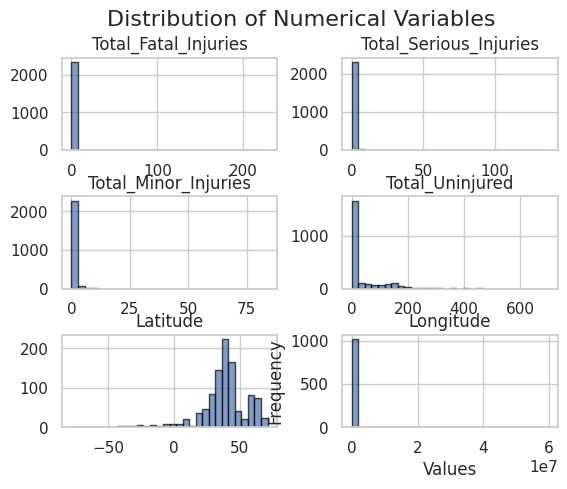

In [294]:
# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Plot histograms for numerical variables
df[numerical_columns].hist(bins=30, edgecolor='black', alpha=0.7)

# Add title and labels
plt.suptitle('Distribution of Numerical Variables', fontsize=16)

# Label the x-axis and y-axis
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout and show the plot
plt.subplots_adjust(hspace=0.5)  # Adjust space between subplots
plt.show()


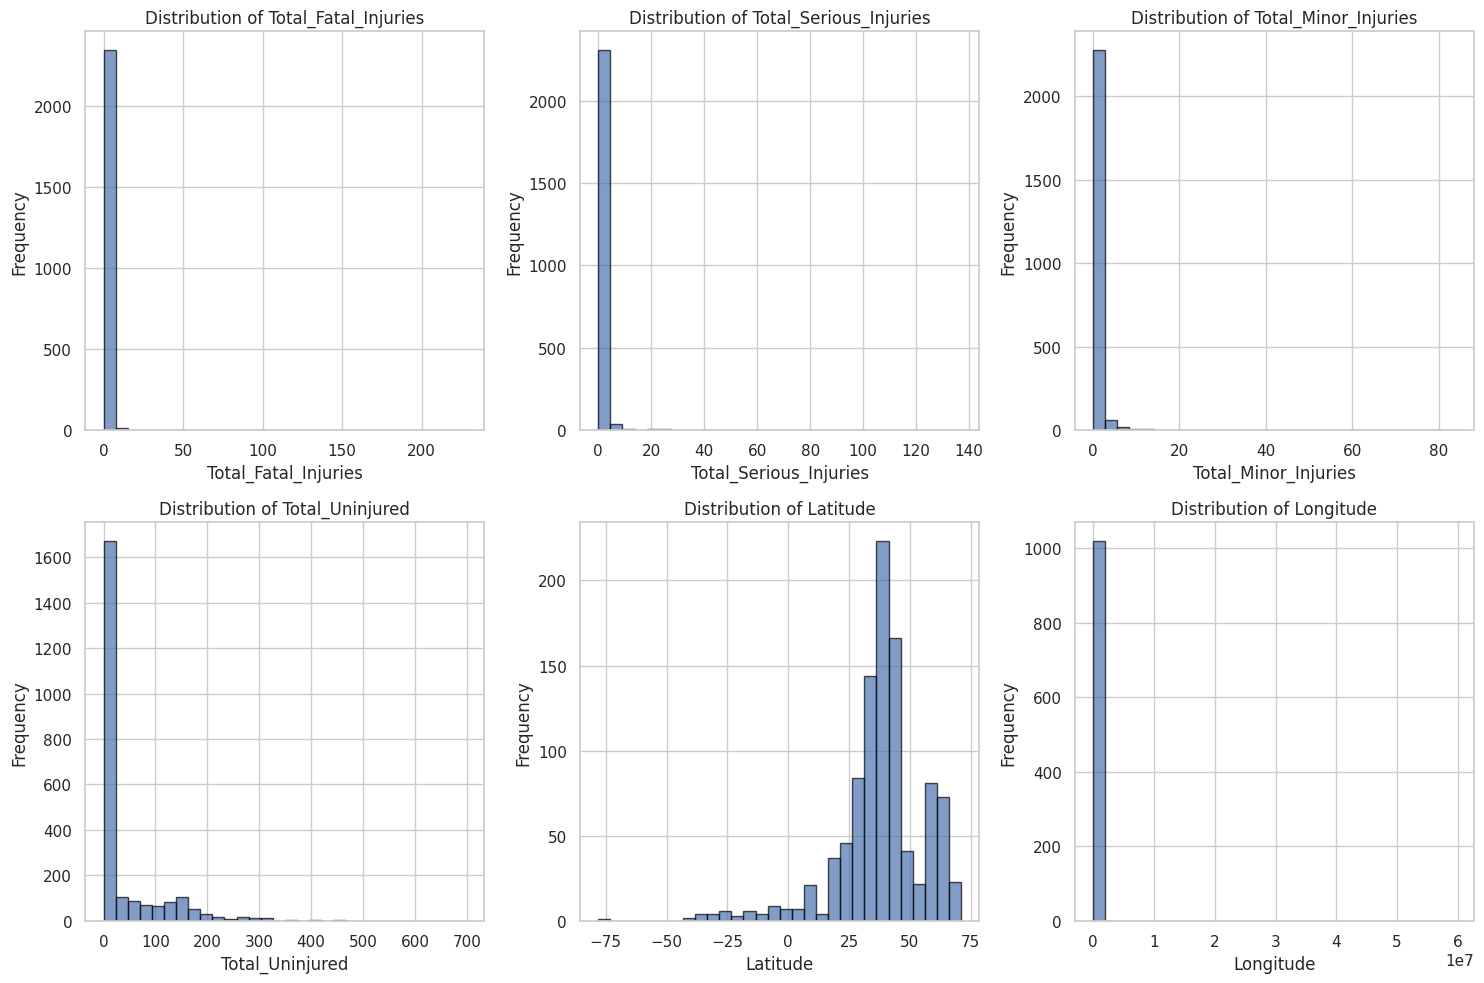

In [295]:
# Determine the number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
ncols = 3  # Set a desired number of columns
nrows = int(np.ceil(num_columns / ncols))  # Calculate rows based on the number of columns

# Set the figure size
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))  # Adjust height dynamically
axes = axes.flatten()  # Flatten the axes array to iterate over

# Plot each histogram on a separate subplot
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Hide any extra axes that were not used
for j in range(num_columns, len(axes)):
    axes[j].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

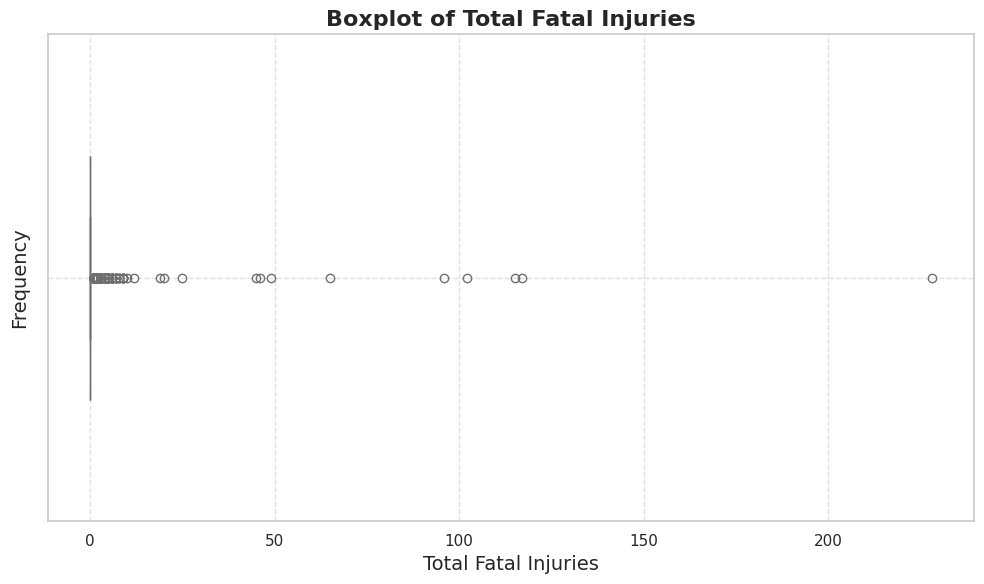

In [296]:
# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Create the boxplot for 'Total_Fatal_Injuries' with improved aesthetics
sns.boxplot(x=df['Total_Fatal_Injuries'], color='skyblue', width=0.5)

# Add title and labels with enhanced readability
plt.title('Boxplot of Total Fatal Injuries', fontsize=16, fontweight='bold')
plt.xlabel('Total Fatal Injuries', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve the grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


**Boxplot of Total Fatal Injuries by Injury Severity:**

This plot visualizes the distribution of total fatal injuries across different injury severity levels. The boxplot provides insights into the spread and outliers of data, helping identify trends or anomalies related to the severity of injuries.

<ipython-input-297-316a89e10933>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Injury_Severity', y='Total_Fatal_Injuries', data=df, palette="Set2")


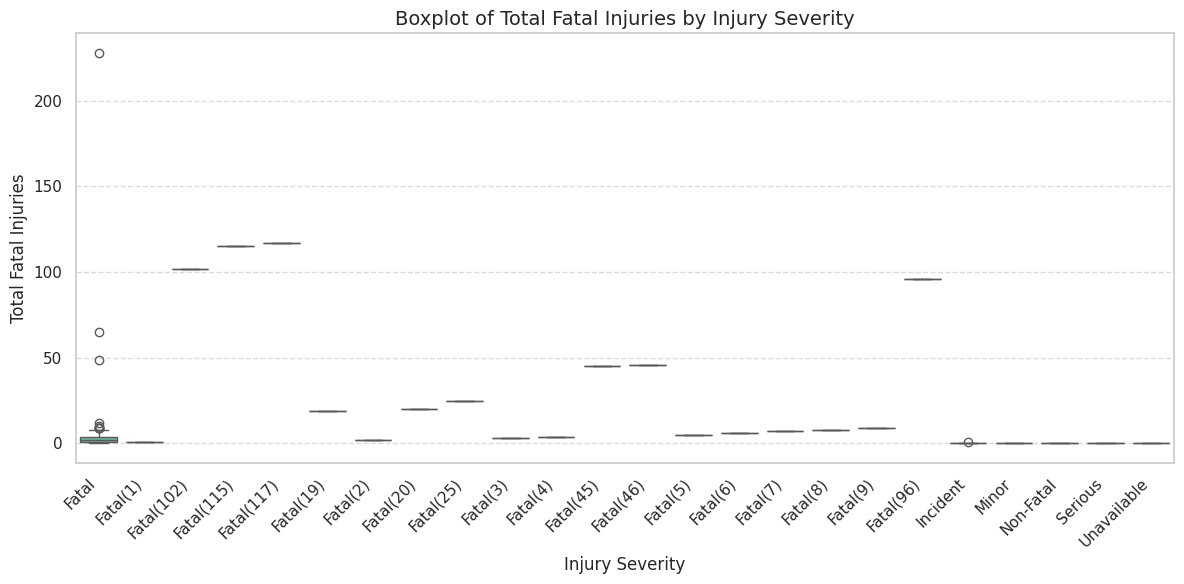

In [297]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Injury_Severity', y='Total_Fatal_Injuries', data=df, palette="Set2")
plt.title('Boxplot of Total Fatal Injuries by Injury Severity', fontsize=14)
plt.xlabel('Injury Severity', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels to prevent overlap
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Violin Plot of Total Fatal Injuries by Aircraft Category:**

The violin plot shows the distribution of total fatal injuries for each aircraft category, combining aspects of a boxplot and a density plot. It helps understand the frequency of injury incidents and potential outliers across different aircraft types.

<ipython-input-299-781520fefa5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Aircraft_Category', y='Total_Fatal_Injuries', data=df, palette="coolwarm")


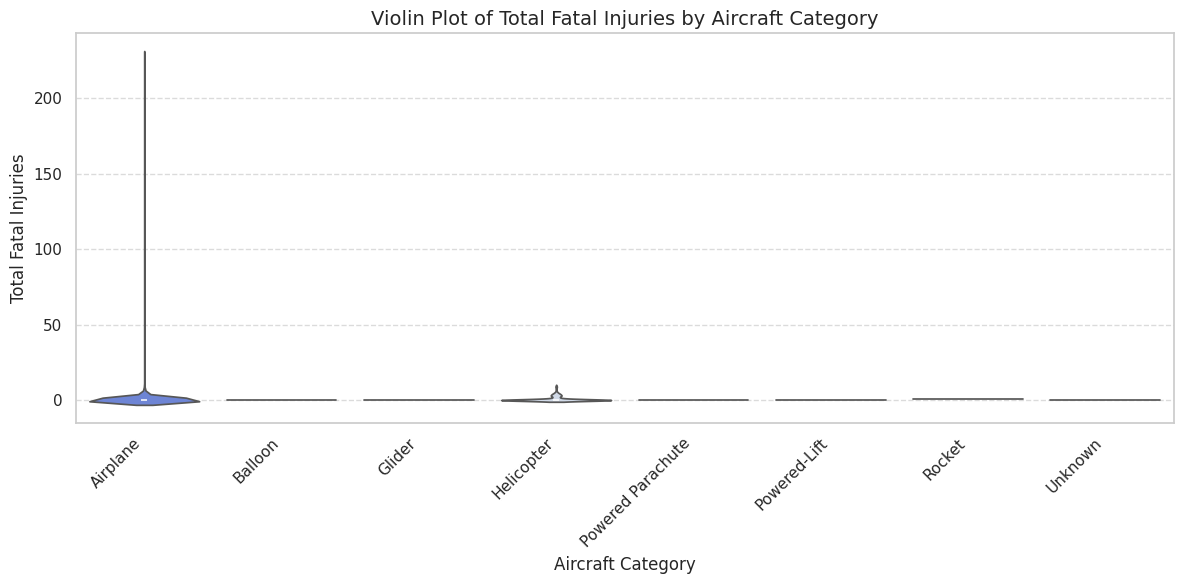

In [299]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Aircraft_Category', y='Total_Fatal_Injuries', data=df, palette="coolwarm")
plt.title('Violin Plot of Total Fatal Injuries by Aircraft Category', fontsize=14)
plt.xlabel('Aircraft Category', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels to prevent overlap
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Pairplot of Injury Data by Aircraft Category**

The pairplot visualizes relationships between multiple injury-related variables (e.g., total fatal, serious, and minor injuries) for different aircraft categories. This plot is useful for identifying correlations between injury types within each aircraft category.



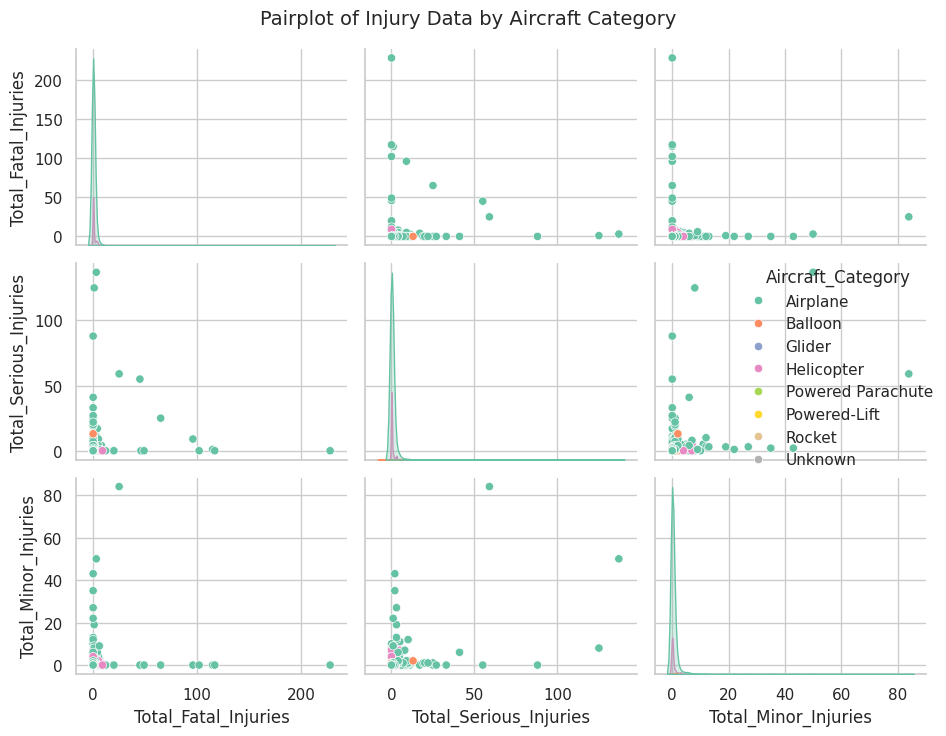

In [300]:
sns.pairplot(df[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Aircraft_Category']], hue='Aircraft_Category', palette="Set2", markers='o')
plt.suptitle('Pairplot of Injury Data by Aircraft Category', fontsize=14)
plt.tight_layout()
plt.show()


**FacetGrid of Total Fatal Injuries by Aircraft Category**

This grid of histograms displays the distribution of total fatal injuries, segmented by aircraft category. Each plot provides a deeper look into how injuries vary across different aircraft categories, allowing for easy comparisons between them.

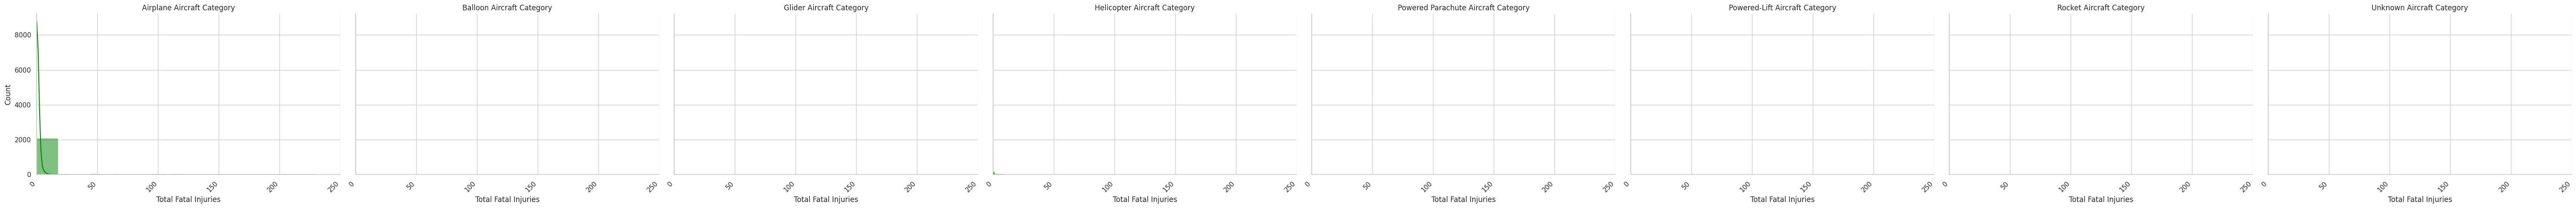

In [302]:
g = sns.FacetGrid(df, col="Aircraft_Category", height=5, aspect=1.5)
g.map(sns.histplot, 'Total_Fatal_Injuries', kde=True, color='green')
g.set_axis_labels('Total Fatal Injuries', 'Count')
g.set_titles("{col_name} Aircraft Category")
g.set(xlim=(0, df['Total_Fatal_Injuries'].max()))
g.set_xticklabels(rotation=45, ha='right')  # Rotate x labels to prevent overlap
plt.tight_layout()
plt.show()


**5.2 Correlation Analysis**

Understanding the relationships between numerical variables is key to identifying potential risk factors for accidents and injuries. Correlation analysis can help reveal patterns that show how different factors interact. Strong correlations between variables could indicate important predictors of aircraft risks.

<Axes: >

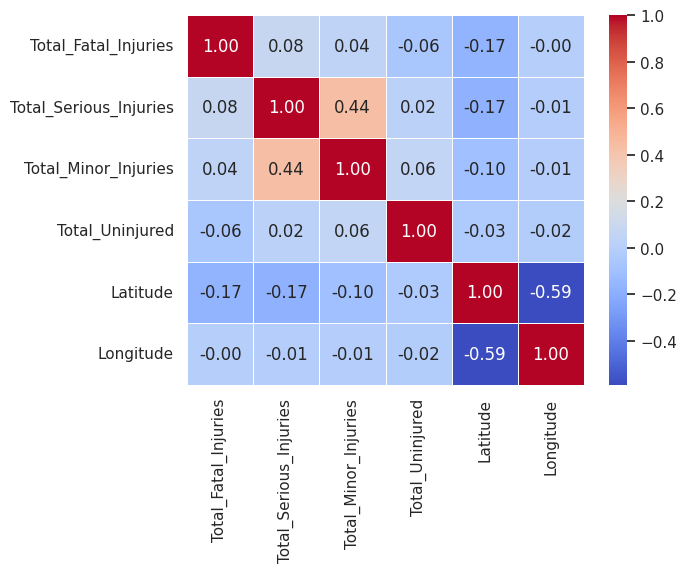

In [303]:
# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


Chi-Square Test Results: p-value = 1.1431332897395403e-06
There is a significant relationship between Injury Severity and Aircraft Category.


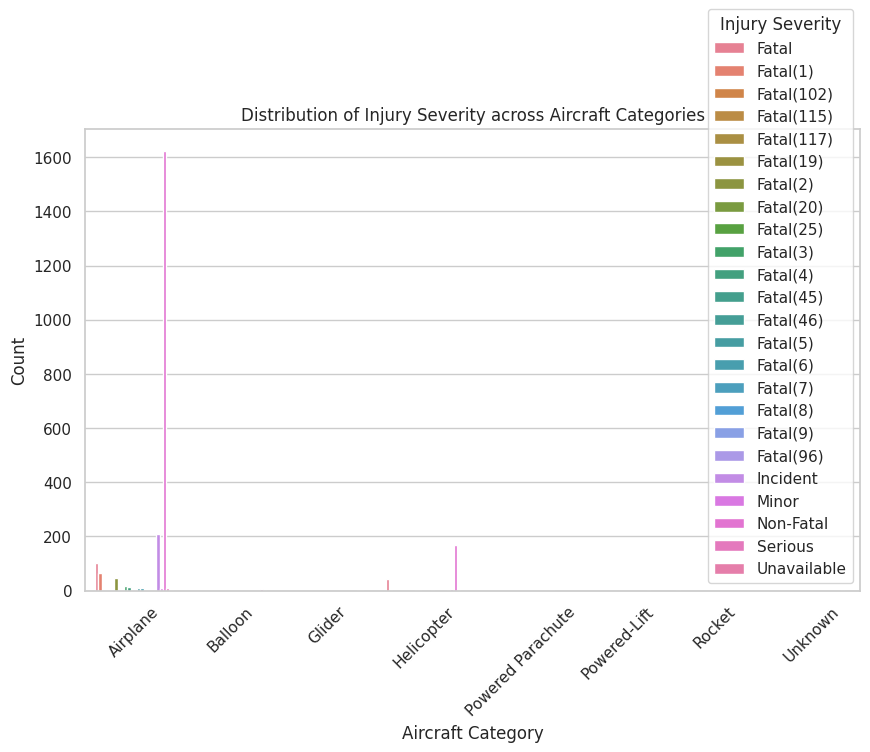

In [304]:
# Ensure 'Injury_Severity' and 'Aircraft_Category' are categorical
df['Injury_Severity'] = df['Injury_Severity'].astype('category')
df['Aircraft_Category'] = df['Aircraft_Category'].astype('category')

# Step 1: Chi-Square Test of Independence
contingency_table = pd.crosstab(df['Injury_Severity'], df['Aircraft_Category'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Results: p-value = {p_value}")

# Step 2: If p-value < 0.05, we reject the null hypothesis (independence)
if p_value < 0.05:
    print("There is a significant relationship between Injury Severity and Aircraft Category.")
else:
    print("There is no significant relationship between Injury Severity and Aircraft Category.")

# Step 3: Stacked Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Aircraft_Category', hue='Injury_Severity', data=df)
plt.title('Distribution of Injury Severity across Aircraft Categories')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.show()


The results of the Chi-Square Test indicate that there is a significant relationship between Injury Severity and Aircraft Category (since the p-value is very small, far below the 0.05 threshold). This means that the severity of injuries tends to vary depending on the category of the aircraft involved in the accidents.

We will check if there's a significant relationship between the Weather_Condition and Injury_Severity.We will also analyze the Chi-Square Test p-values and visualize the results to derive actionable insights, which can be used to assess aircraft risks and help prioritize safe aircraft acquisitions.

In [305]:
# Chi-Square Test: Weather Condition vs. Injury Severity
weather_injury_ct = pd.crosstab(df['Weather_Condition'], df['Injury_Severity'])
chi2_weather_injury, p_weather_injury, _, _ = chi2_contingency(weather_injury_ct)

# Display results
print(f"Chi-Square Test p-value for Weather Condition vs. Injury Severity: {p_weather_injury}")


Chi-Square Test p-value for Weather Condition vs. Injury Severity: 2.728174534943921e-05


let’s check if the phase of flight has any influence on the injury severity.

In [306]:
# Chi-Square Test: Phase of Flight vs. Injury Severity
phase_injury_ct = pd.crosstab(df['Phase_of_Flight'], df['Injury_Severity'])
chi2_phase_injury, p_phase_injury, _, _ = chi2_contingency(phase_injury_ct)

# Display results
print(f"Chi-Square Test p-value for Phase of Flight vs. Injury Severity: {p_phase_injury}")


Chi-Square Test p-value for Phase of Flight vs. Injury Severity: 2.9921713529225025e-76


check if there is a relationship between the Aircraft_Category and Weather_Condition, which might help understand the conditions under which certain aircraft types are more likely to experience accidents.

In [307]:
# Chi-Square Test: Aircraft Category vs. Weather Condition
category_weather_ct = pd.crosstab(df['Aircraft_Category'], df['Weather_Condition'])
chi2_category_weather, p_category_weather, _, _ = chi2_contingency(category_weather_ct)

# Display results
print(f"Chi-Square Test p-value for Aircraft Category vs. Weather Condition: {p_category_weather}")


Chi-Square Test p-value for Aircraft Category vs. Weather Condition: 0.7327967405159014


stacked bar plots for the Weather_Condition vs. Injury_Severity and Phase_of_Flight vs. Injury_Severity.

<Figure size 1000x600 with 0 Axes>

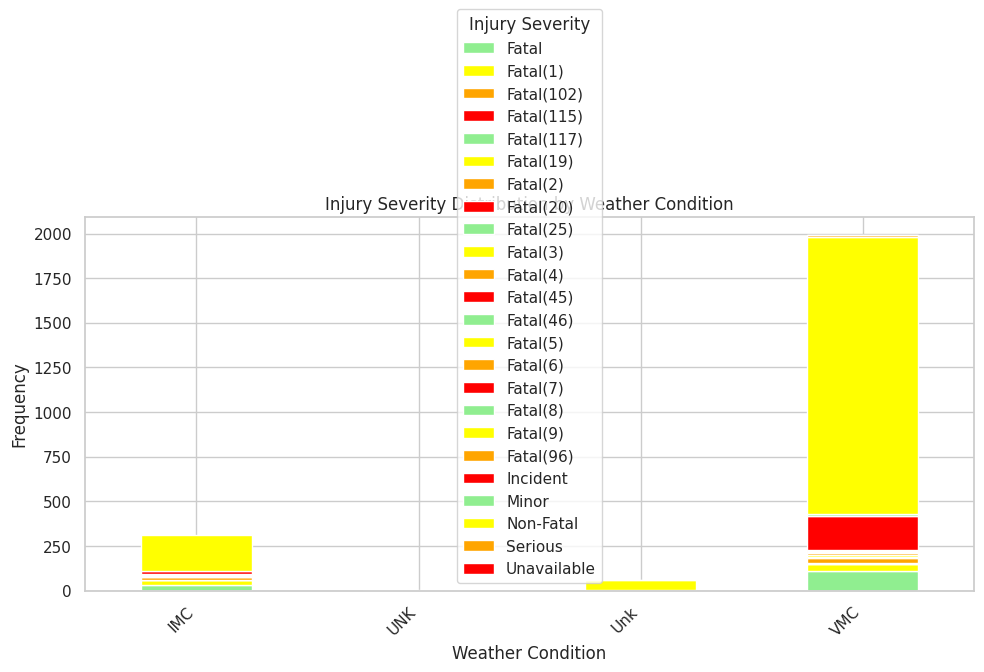

<Figure size 1000x600 with 0 Axes>

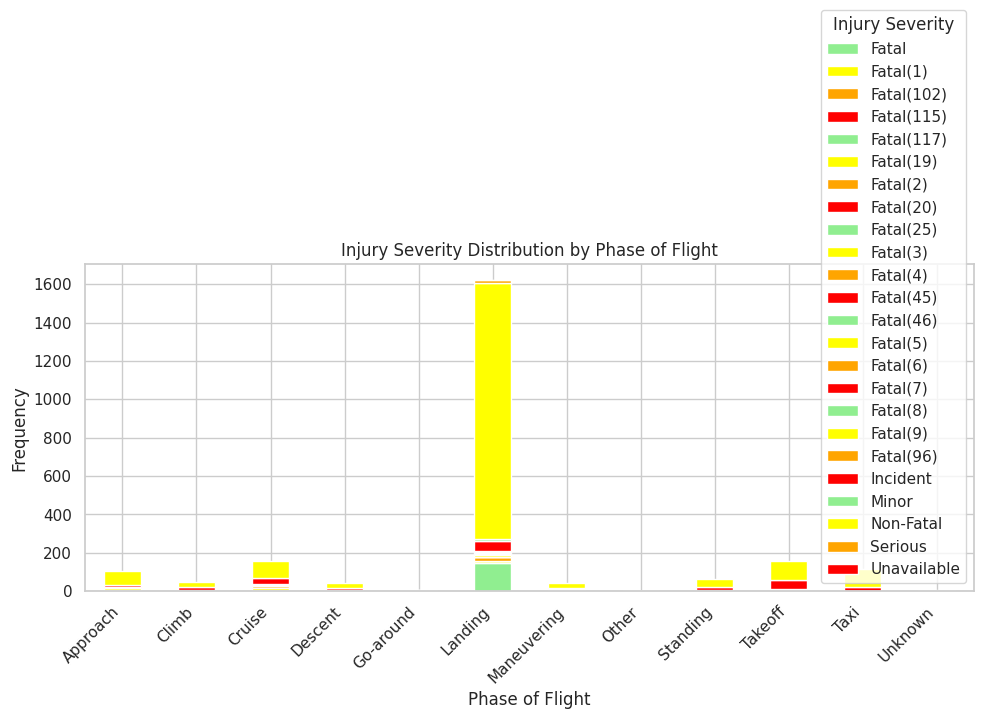

In [308]:
# Weather Condition vs Injury Severity stacked bar plot
plt.figure(figsize=(10, 6))
weather_injury_ct.plot(kind='bar', stacked=True, color=['lightgreen', 'yellow', 'orange', 'red'], figsize=(10, 6))
plt.title('Injury Severity Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.show()

# Phase of Flight vs Injury Severity stacked bar plot
plt.figure(figsize=(10, 6))
phase_injury_ct.plot(kind='bar', stacked=True, color=['lightgreen', 'yellow', 'orange', 'red'], figsize=(10, 6))
plt.title('Injury Severity Distribution by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.show()


# 5.3. Key Risk Factors Analysis
Correlation Analysis Between Aircraft_Damage and Total_Fatal_Injuries
Correlation analysis will help us understand the relationship between the type of aircraft damage and the number of fatalities in accidents. Since Aircraft_Damage is a categorical variable, we can use a chi-square test or analyze the relationship using visualizations like boxplots or bar charts.

Implementation: We will examine the correlation between the Aircraft_Damage type and Total_Fatal_Injuries. Since Aircraft_Damage is a categorical variable and Total_Fatal_Injuries is numerical, a boxplot or group-by analysis would be helpful.

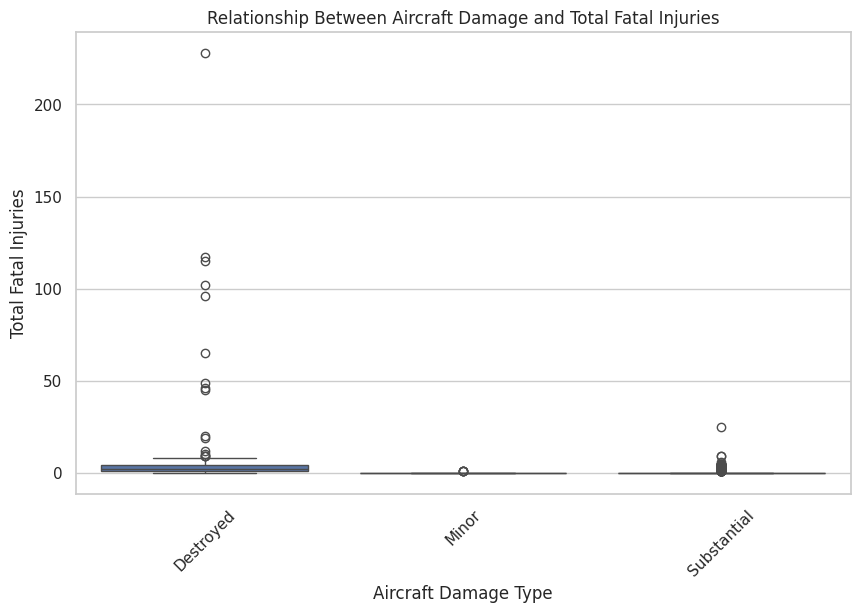

In [309]:
# Boxplot to analyze the relationship between Aircraft_Damage and Total_Fatal_Injuries
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aircraft_Damage', y='Total_Fatal_Injuries', data=df)
plt.title('Relationship Between Aircraft Damage and Total Fatal Injuries')
plt.xlabel('Aircraft Damage Type')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


Alternatively, we can group the data by Aircraft_Damage and calculate the mean or median of Total_Fatal_Injuries to better understand the severity across different damage types.

**Further Analysis**

- Weather Condition & Injury Severity
Another important factor that could be a risk factor is the weather condition during the flight. We will analyze the relationship between Weather_Condition and Total_Fatal_Injuries.

- We can create a bar plot showing the mean or count of fatalities grouped by Weather_Condition. This will help us identify if specific weather conditions are associated with higher fatality rates.

<ipython-input-310-fbf3c5c5cc51>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_fatalities = df.groupby('Weather_Condition')['Total_Fatal_Injuries'].mean().reset_index()


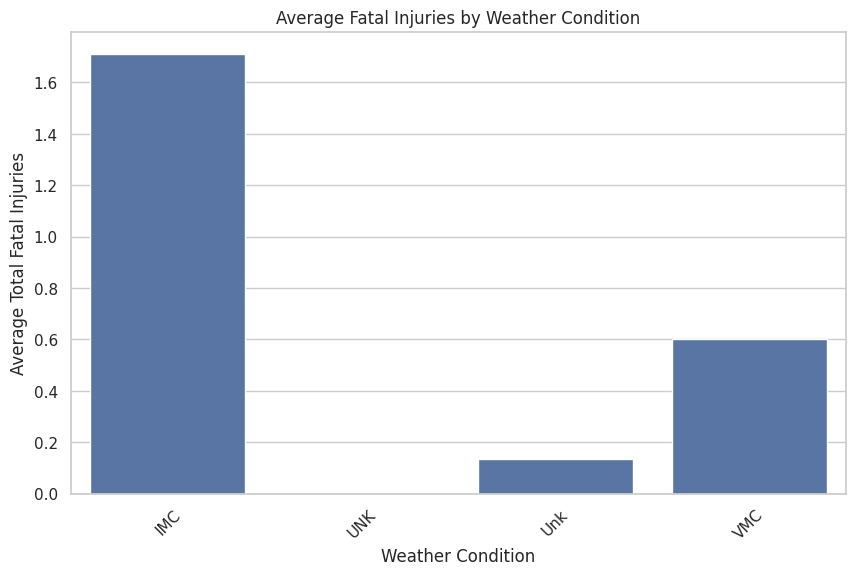

In [310]:
# Group by Weather Condition and calculate the mean of Total Fatal Injuries
weather_fatalities = df.groupby('Weather_Condition')['Total_Fatal_Injuries'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_Condition', y='Total_Fatal_Injuries', data=weather_fatalities)
plt.title('Average Fatal Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()


Identifying Risk Factors

- Aircraft Category & Injury Severity
Next, we will analyze how the type of aircraft category (e.g., commercial, private, military) influences the number of injuries, particularly fatalities and serious injuries.

- We can use a boxplot or bar plot to visualize how Aircraft_Category correlates with Total_Fatal_Injuries.

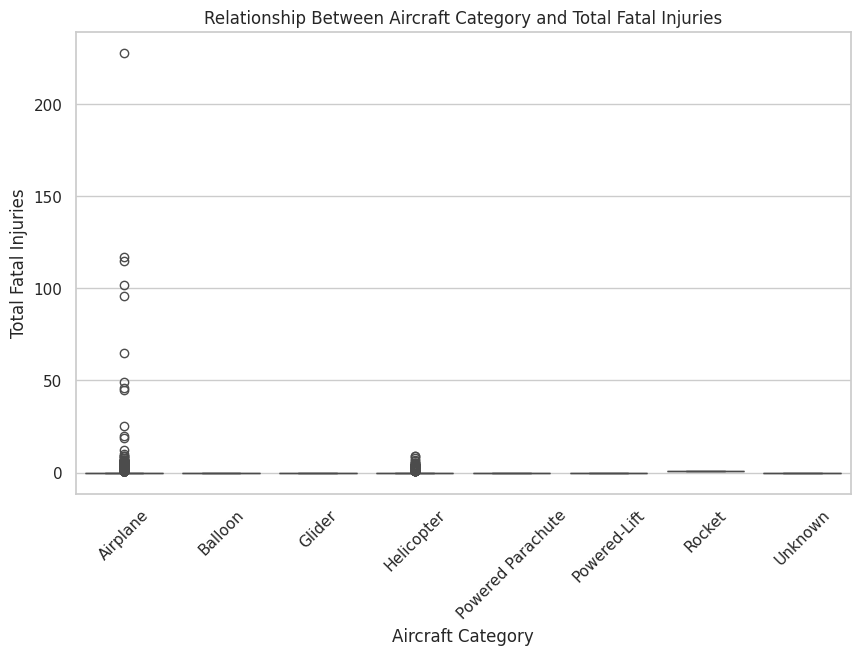

In [311]:
# Boxplot to analyze the relationship between Aircraft Category and Total Fatal Injuries
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aircraft_Category', y='Total_Fatal_Injuries', data=df)
plt.title('Relationship Between Aircraft Category and Total Fatal Injuries')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()


Once the visualizations and statistical tests are performed, we can summarize
the key risk factors and provide actionable insights.


**Heatmap of Categorical Variables**

We can use a heatmap to visualize a contingency table. This can be a good way to see patterns of relationships between categorical variables.It will create a table with counts of categories and use color intensities to represent frequencies.

The heatmap will visually reveal the relationship between different categorical variables, such as Injury_Severity and Aircraft_Damage, by showing the frequency of occurrences for each combination. This will help identify patterns and associations, highlighting which factors are most strongly linked to severe outcomes in aircraft accidents.

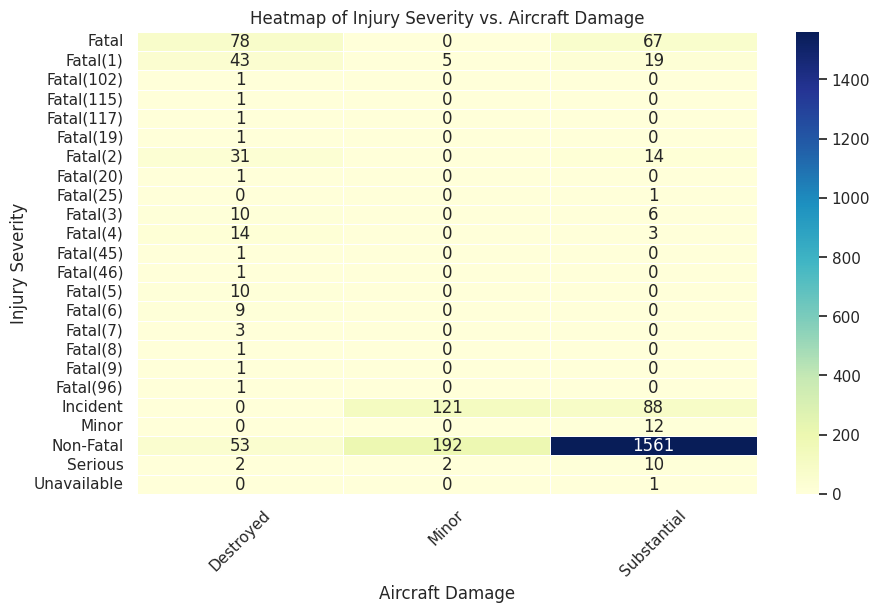

In [312]:
# Generate a contingency table (cross-tabulation) between Injury_Severity and Aircraft_Damage
contingency_table = pd.crosstab(df['Injury_Severity'], df['Aircraft_Damage'])

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=True)

# Adding labels and title
plt.title('Heatmap of Injury Severity vs. Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Injury Severity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<ipython-input-313-b14f42923bf6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([df['Event.Date'].dt.year, 'Aircraft_Category'])


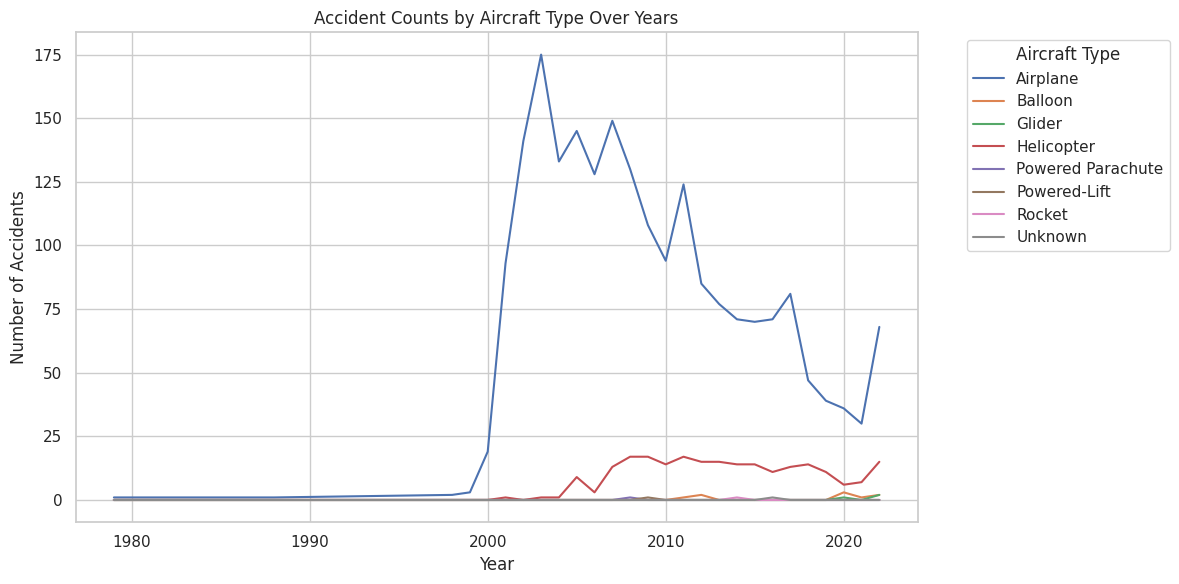

<ipython-input-313-b14f42923bf6>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_by_weather_phase = df.groupby(['Weather_Condition', 'Phase_of_Flight']).size().reset_index(name='Accident_Count')


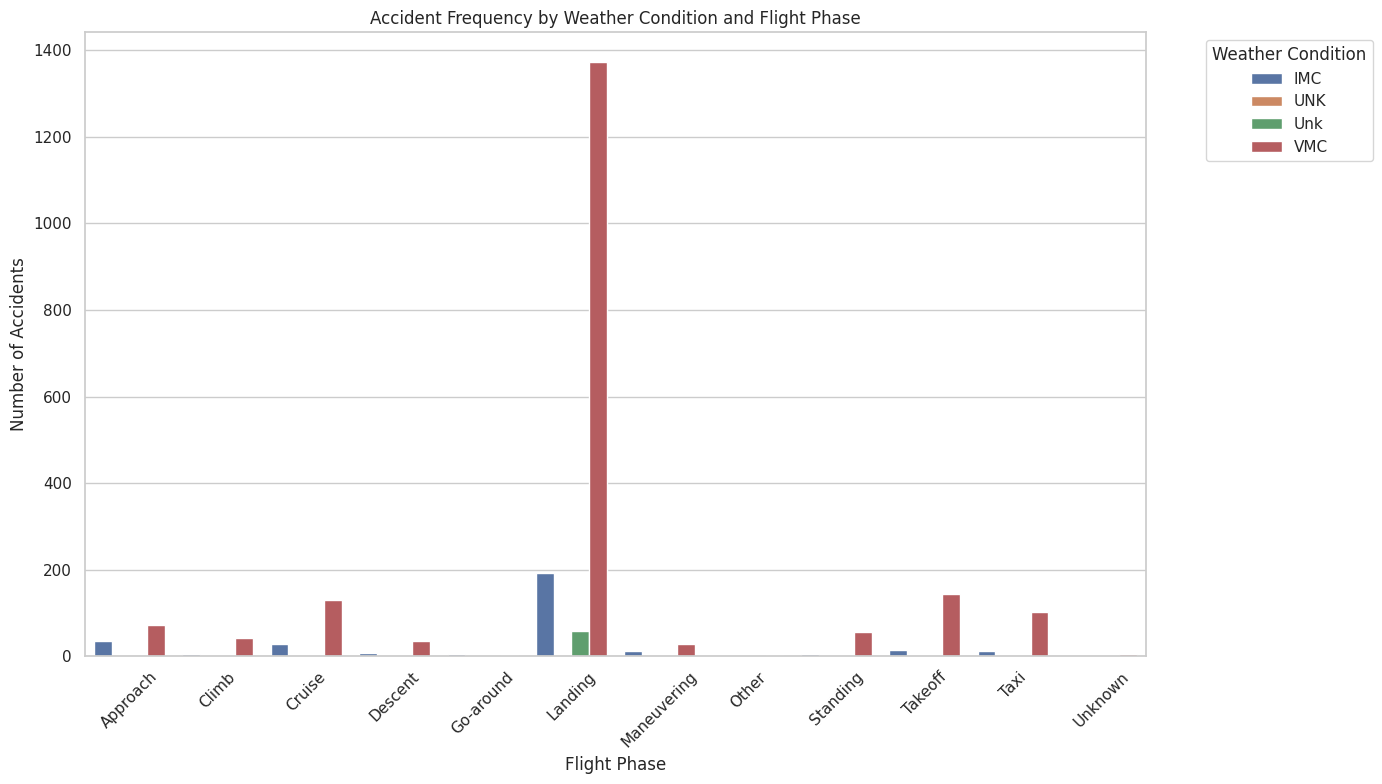

In [313]:
# Accident counts by Aircraft Type over years
# Convert the date column to datetime if it isn't already
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Group by year and Aircraft_Category
accidents_by_type_year = (
    df.groupby([df['Event.Date'].dt.year, 'Aircraft_Category'])
      .size()
      .reset_index(name='Accident_Count')
)

# Rename the year column for clarity
accidents_by_type_year = accidents_by_type_year.rename(columns={'Event.Date': 'Year'})

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=accidents_by_type_year, x='Year', y='Accident_Count', hue='Aircraft_Category')
plt.title('Accident Counts by Aircraft Type Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Aircraft Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Accident frequency by Weather Condition and Phase of Flight
accidents_by_weather_phase = df.groupby(['Weather_Condition', 'Phase_of_Flight']).size().reset_index(name='Accident_Count')
plt.figure(figsize=(14,8))
sns.barplot(data=accidents_by_weather_phase, x='Phase_of_Flight', y='Accident_Count', hue='Weather_Condition')
plt.title('Accident Frequency by Weather Condition and Flight Phase')
plt.xlabel('Flight Phase')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [314]:
# show columns for subsequent analysis
print(df.columns)

Index(['Event_Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose_of_Flight', 'Air.carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Phase_of_Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


**6. Risk Assessment and Scoring**

***6.1 Objective***

To support the business in identifying the lowest-risk aircraft types, we develop a risk scoring model that quantifies the risk associated with different aircraft. This model
The number of accidents involving each aircraft type.

The total fatalities associated with those accidents.

The average fatalities per accident as a measure of accident severity.

Additional operational characteristics such as the number of engines to refine the risk profile.

This quantitative risk score enables data-driven decision-making for aircraft acquisition.

***6.2 Methodology***

**Data Preparation:**
Convert relevant columns to numeric types and handle missing data.

**Aggregation:**
Group data by a chosen aircraft attribute (e.g., Make, Model, or Aircraft_Category) and compute:

Total accidents (count of unique events).

Total fatalities (sum of fatal injuries).

Average fatalities per accident.

**Feature Normalization:**
Normalize these metrics to a common scale (0 to 1) to allow fair combination.

**Risk Score Calculation:**
Combine normalized features using weighted sums reflecting their importance.

**Ranking and Visualization:**
Rank aircraft by risk score and visualize the highest-risk aircraft.




**Risk Scoring Model**

To quantitatively assess the relative safety risk of different aircraft manufacturers, we developed a risk scoring model based on historical accident data. The model incorporates multiple factors that reflect both the frequency and severity of accidents:

Total Accidents: The number of recorded accidents involving aircraft from each manufacturer.

Total Fatalities: The cumulative number of fatal injuries in these accidents.

Average Fatalities per Accident: A measure of accident severity, calculated as total fatalities divided by total accidents.

***Methodology***


Data Aggregation:
We group the accident records by aircraft manufacturer (Make) and calculate the above metrics.

Normalization:
Since these metrics are on different scales, we normalize them to a 0–1 range using Min-Max scaling. This ensures fair weighting when combining the features.

Weighted Risk Score Calculation:
We assign weights to each normalized metric to reflect their relative importance:

Total Accidents: 40%

Total Fatalities: 40%

Average Fatalities per Accident: 20%

The weighted sum of these normalized metrics produces the final Risk Score for each manufacturer.

Ranking:
Manufacturers are ranked by their risk scores in descending order, with higher scores indicating higher relative risk.

**Purpose**


This risk scoring model provides a data-driven, transparent means to identify aircraft manufacturers associated with higher accident risk. It supports informed decision-making for aircraft acquisition by highlighting manufacturers with safer operational histories.


In [327]:
# Aggregate by Make
risk_df = df.groupby('Make').agg(
    Total_Accidents=('Event_Id', 'count'),
    Total_Fatalities=('Total_Fatal_Injuries', 'sum')
).reset_index()

# Average fatalities per accident
risk_df['Avg_Fatalities_per_Accident'] = risk_df['Total_Fatalities'] / risk_df['Total_Accidents']
risk_df['Avg_Fatalities_per_Accident'] = risk_df['Avg_Fatalities_per_Accident'].fillna(0)

# Normalize for risk scoring
scaler = MinMaxScaler()
risk_df[['Norm_Accidents', 'Norm_Fatalities', 'Norm_Avg_Fatalities']] = scaler.fit_transform(
    risk_df[['Total_Accidents', 'Total_Fatalities', 'Avg_Fatalities_per_Accident']]
)

# Weighted risk score
risk_df['Risk_Score'] = (
    0.4 * risk_df['Norm_Accidents'] +
    0.4 * risk_df['Norm_Fatalities'] +
    0.2 * risk_df['Norm_Avg_Fatalities']
)

# Sort by risk score
risk_df = risk_df.sort_values('Risk_Score', ascending=False).reset_index(drop=True)
risk_df.head(10)


,Make,Total_Accidents,Total_Fatalities,Avg_Fatalities_per_Accident,Norm_Accidents,Norm_Fatalities,Norm_Avg_Fatalities,Risk_Score
0,BOEING,397,563.0,1.418136,0.881960,1.000000,0.177267,0.788237
1,CESSNA,450,199.0,0.442222,1.000000,0.353464,0.055278,0.552441
2,AIRBUS,78,230.0,2.948718,0.171492,0.408526,0.368590,0.305725
3,BELL,138,112.0,0.811594,0.305122,0.198934,0.101449,0.221913
4,RAYTHEON CORPORATE JETS,1,8.0,8.000000,0.000000,0.014210,1.000000,0.205684
5,PIPER,166,68.0,0.409639,0.367483,0.120782,0.051205,0.205547
6,BRITISH AEROSPACE,5,32.0,6.400000,0.008909,0.056838,0.800000,0.186299
7,FOKKER,10,46.0,4.600000,0.020045,0.081705,0.575000,0.155700
8,BEECH,115,37.0,0.321739,0.253898,0.065719,0.040217,0.135890
9,DE HAVILLAND,54,62.0,1.148148,0.118040,0.110124,0.143519,0.119969


**Visualization 1: Top 15 Aircraft Makes by Risk Score**


This horizontal bar chart displays the top 15 aircraft manufacturers ranked by their calculated risk scores. The risk score quantifies the relative safety risk associated with each aircraft make, based on factors such as accident frequency and severity.

The y-axis lists the aircraft manufacturers.

The x-axis shows the risk score, where a higher score indicates greater risk.

The chart helps identify which manufacturers’ aircraft have historically been involved in more severe or frequent accidents.

This insight supports data-driven decisions for selecting lower-risk aircraft for purchase and operation.

Note: The aircraft makes have been standardized (converted to uppercase and stripped of whitespace) to avoid duplication due to inconsistent naming.

                      Make  Total_Accidents  Total_Fatalities  \
0                   BOEING              397             563.0   
1                   CESSNA              450             199.0   
2                   AIRBUS               78             230.0   
3                     BELL              138             112.0   
4  RAYTHEON CORPORATE JETS                1               8.0   
5                    PIPER              166              68.0   
6        BRITISH AEROSPACE                5              32.0   
7                   FOKKER               10              46.0   
8                    BEECH              115              37.0   
9             DE HAVILLAND               54              62.0   

   Avg_Fatalities_per_Accident  Norm_Total_Accidents  Norm_Total_Fatalities  \
0                     1.418136              0.881960               1.000000   
1                     0.442222              1.000000               0.353464   
2                     2.948718              0.1

<ipython-input-325-7e3c5d71a248>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk_scores_make.head(15), x='Risk_Score', y='Make', palette='Reds_r')


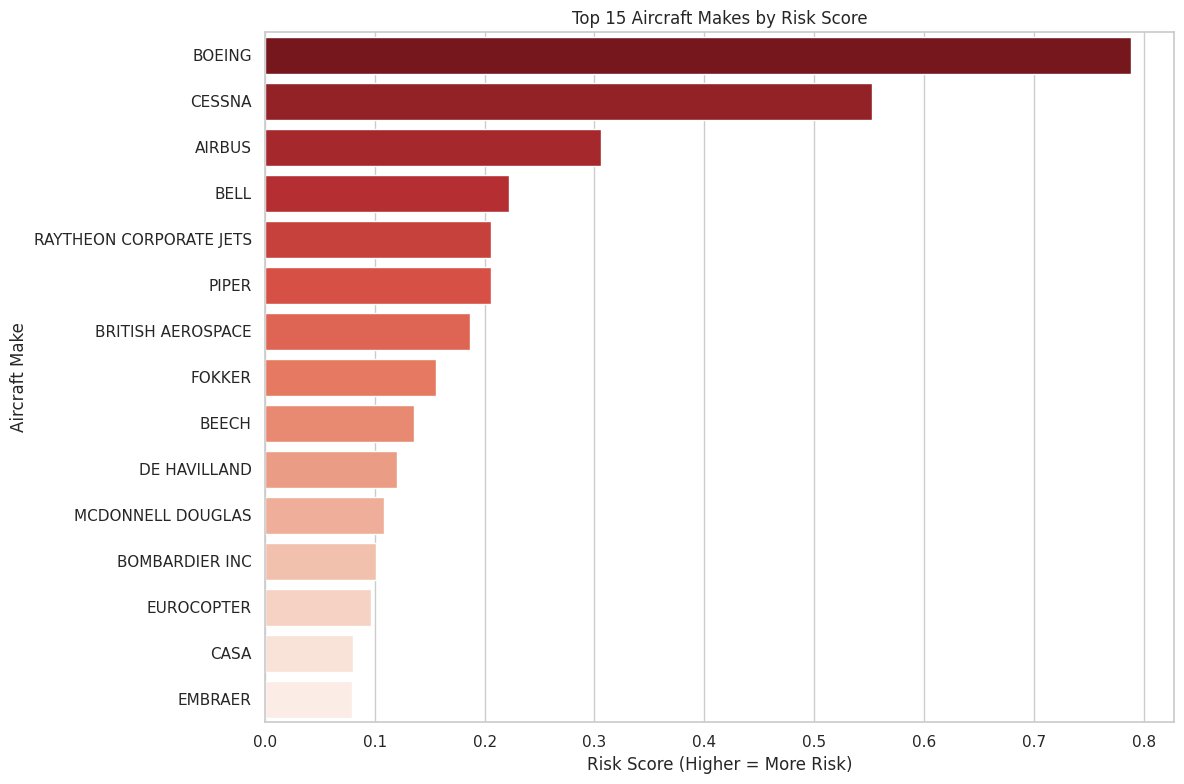

In [325]:
def calculate_risk_scores(df, group_by_col='Aircraft_Category', features=None, weights=None):
    """
    Calculate risk scores for aircraft based on specified features and grouping.

    Parameters:
    - df: pandas DataFrame with aviation data
    - group_by_col: column name to group by (e.g., 'Make', 'Model', 'Aircraft_Category')
    - features: list of columns to include in risk scoring (must be numeric)
    - weights: list of weights corresponding to features (must sum to 1)

    Returns:
    - risk_df: DataFrame with risk scores and normalized feature columns
    """
    if features is None:
        features = ['Total_Accidents', 'Total_Fatalities', 'Avg_Fatalities_per_Accident']
    if weights is None:
        weights = [0.4, 0.4, 0.2]
    assert len(features) == len(weights), "Features and weights must be the same length"
    assert abs(sum(weights) - 1.0) < 1e-6, "Weights must sum to 1"

    # Convert fatalities column to numeric, fill missing with 0
    df['Total_Fatal_Injuries'] = pd.to_numeric(df['Total_Fatal_Injuries'], errors='coerce').fillna(0)

    # Aggregate data by the chosen group
    agg_dict = {
        'Event_Id': 'count',  # Number of accidents
        'Total_Fatal_Injuries': 'sum'
    }
    risk_df = df.groupby(group_by_col).agg(agg_dict).rename(
        columns={'Event_Id': 'Total_Accidents', 'Total_Fatal_Injuries': 'Total_Fatalities'}
    ).reset_index()

    # Calculate average fatalities per accident
    risk_df['Avg_Fatalities_per_Accident'] = risk_df['Total_Fatalities'] / risk_df['Total_Accidents']
    risk_df['Avg_Fatalities_per_Accident'] = risk_df['Avg_Fatalities_per_Accident'].fillna(0)

    # Normalize features
    scaler = MinMaxScaler()
    norm_features = []
    for feat in features:
        if feat in risk_df.columns:
            norm_col = 'Norm_' + feat
            risk_df[norm_col] = scaler.fit_transform(risk_df[[feat]])
            norm_features.append(norm_col)

    # Calculate weighted risk score
    risk_df['Risk_Score'] = 0
    for w, nf in zip(weights, norm_features):
        risk_df['Risk_Score'] += w * risk_df[nf]

    # Sort descending by risk score
    risk_df = risk_df.sort_values('Risk_Score', ascending=False).reset_index(drop=True)

    return risk_df

# Example usage: Group by 'Make' and include operational feature 'Number.of.Engines'
features = ['Total_Accidents', 'Total_Fatalities', 'Avg_Fatalities_per_Accident']
weights = [0.4, 0.4, 0.2]

risk_scores_make = calculate_risk_scores(df, group_by_col='Make', features=features, weights=weights)

# Display top 10 highest-risk aircraft makes
print(risk_scores_make.head(10))

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=risk_scores_make.head(15), x='Risk_Score', y='Make', palette='Reds_r')
plt.title('Top 15 Aircraft Makes by Risk Score')
plt.xlabel('Risk Score (Higher = More Risk)')
plt.ylabel('Aircraft Make')
plt.tight_layout()
plt.show()


Show Only the Top N Categories

Instead of plotting all categories, plot only the top (or bottom) N by risk score or accident rate:

**Visualization 2: Accident Frequency by Weather Condition and Phase of Flight**

This grouped bar chart illustrates the distribution of aviation accidents by weather condition and phase of flight:

The x-axis shows different phases of flight (e.g., takeoff, approach, cruise).

The y-axis represents the number of accidents occurring in each phase.

Bars are grouped and colored by weather condition:

IMC: Instrument Meteorological Conditions (poor visibility, requiring instrument flight)

VMC: Visual Meteorological Conditions (good visibility)

UNK / Unk: Unknown or unreported weather conditions

The chart reveals how accident frequency varies across flight phases and weather conditions, highlighting risk factors such as poor visibility during critical flight phases.

This visualization aids in understanding environmental and operational factors contributing to aviation accidents, informing risk mitigation strategies.

<ipython-input-326-ccfb89d83214>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Weather_Condition', 'Phase_of_Flight'])


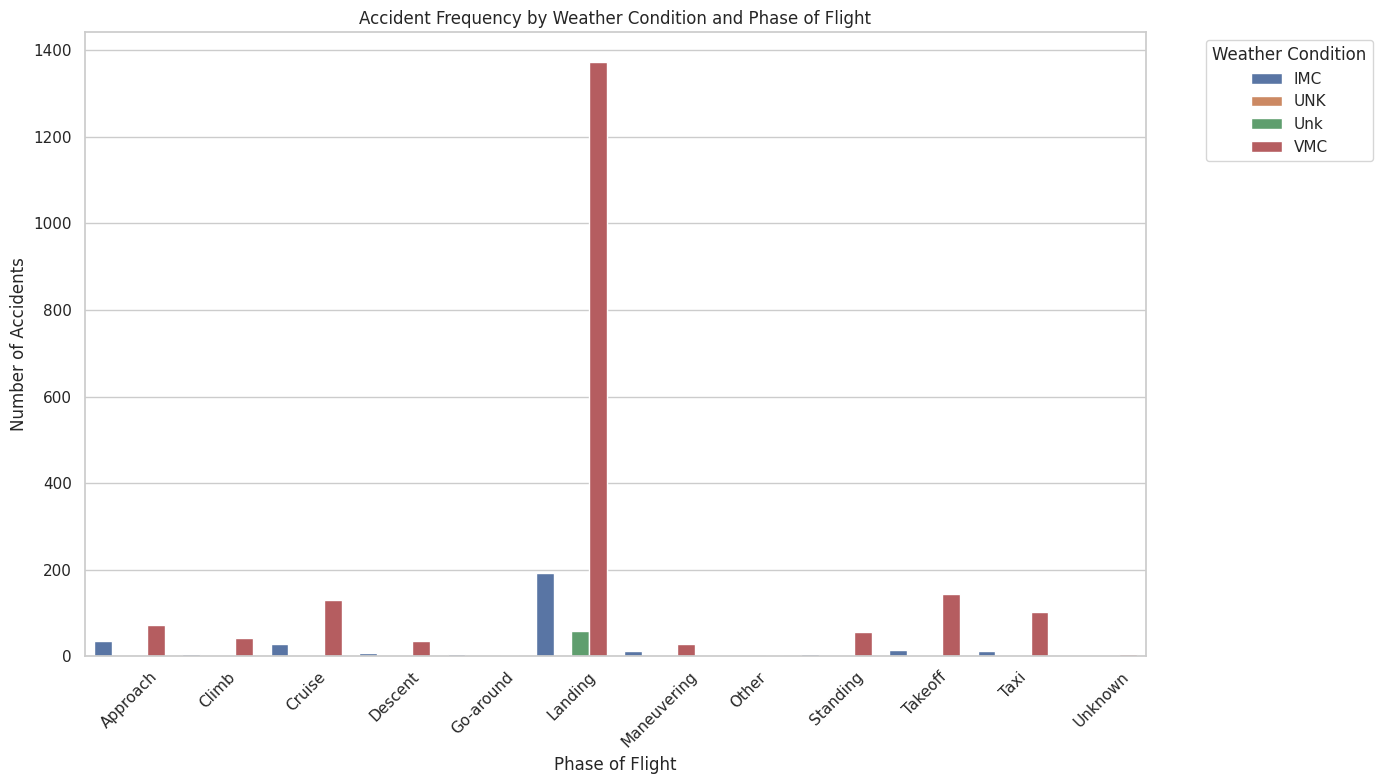

In [326]:
# Grouping accidents by weather condition and phase of flight
accidents_by_weather_phase = (
    df.groupby(['Weather_Condition', 'Phase_of_Flight'])
      .size()
      .reset_index(name='Accident_Count')
)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(
    data=accidents_by_weather_phase,
    x='Phase_of_Flight',
    y='Accident_Count',
    hue='Weather_Condition'
)
plt.title('Accident Frequency by Weather Condition and Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



***Streamlit Dashboard***

This dashboard provides a comprehensive analysis of aviation accident data, focusing on identifying low-risk aircraft for potential acquisition. The interactive visualizations help stakeholders understand risk factors across different aircraft makes, weather conditions, and phases of flight.

**Key Features**


1. Risk Score Analysis
Aircraft Risk Scoring: Visualizes the top aircraft makes ranked by calculated risk scores

Interactive Filtering: Adjust the number of manufacturers displayed (5-20)

Risk Components: Combines accident frequency, total fatalities, and severity metrics

2. Environmental Factor Analysis
Weather Condition Impact: Filter accidents by weather conditions (VMC, IMC, Unknown)

Flight Phase Distribution: Identify which phases of flight have higher accident rates

Combined Analysis: Understand the interaction between weather and flight phase

**Business Recommendations**


Prioritize aircraft from manufacturers with lower risk scores to reduce operational risk.

Enhance pilot training and safety protocols during high-risk flight phases and adverse weather conditions.

Implement continuous monitoring of risk scores and accident trends to inform fleet management decisions.

**Data Sources**


This dashboard analyzes NTSB aviation accident data spanning multiple decades, with standardized aircraft make names and comprehensive accident details.

**How to Use**


Use the sidebar filters to adjust the visualizations and focus on specific aspects of the data. The risk scoring model helps identify safer aircraft makes for potential acquisition, supporting data-driven decision making for your aviation division.

In [320]:
# See aviaon_dashboard.py script
# To run the app, use the command:
# streamlit run aviation_dashboard.py on bas or cmd

### Business Recommendations

1. **Acquire Aircraft from Lower-Risk Manufacturers**  
   Focus your fleet acquisition on manufacturers with the lowest risk scores (see bar chart above). This will minimize operational risk and improve safety records.

2. **Enhance Training and Protocols for High-Risk Phases and Weather**  
   The majority of accidents occur during takeoff, landing, and in VMC (Visual Meteorological Conditions). Prioritize training and develop strict protocols for these situations.

3. **Implement Ongoing Risk Monitoring**  
   Regularly update your risk assessment using new data. Continuously monitor accident trends by make, weather, and flight phase to inform purchases and operational changes.

These recommendations are directly supported by the visualizations and risk scoring model above.


**Summary:**  
This notebook provides a data-driven approach to identifying the safest aircraft makes for acquisition, highlights operational risks by weather and flight phase, and delivers actionable recommendations for management.

**Next Steps:**  
- Integrate this analysis into an interactive dashboard for ongoing monitoring.
- Extend the risk model to include more operational variables (e.g., engine type, aircraft age).
- Collaborate with safety experts to refine recommendations.


**Save Cleaned Data and Results**


In [321]:
df.to_csv('aviation_data_cleaned.csv', index=False)
risk_df.to_csv('aircraft_make_risk_scores.csv', index=False)
